Since running the text analysis is going to cost money, it is important to get it right the first time and not need to debug at all. Therefore, I am creating some fake text analysis to make sure the functions work

/var/folders/9j/j4gyltgs6txd83bg66_mv4fn664jzt/T/ipykernel_17267/439187254.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_with_medication[sentiment_col_name] = sentiments
/var/folders/9j/j4gyltgs6txd83bg66_mv4fn664jzt/T/ipykernel_17267/439187254.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_with_medication[reason_col_name] = reasons


Sentiment Breakdown:
1: Count - 2, Percentage - 100.00%


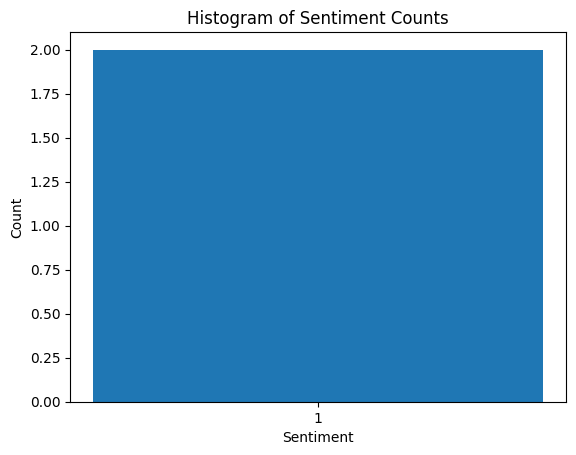

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Mock function to simulate the OpenAI API response
def mock_get_medication_sentiment(medication_name, text):
    # A mock response simulating the structure of the API response
    return {'sentiment': '1', 'reason': 'The medication helped to treat the poster with minor side effects.'}

# Sample function to get synonym for a medication
def get_synonym(medication_name):
    # Implement your logic to get synonyms here
    return "synonym"

# Sample DataFrame
data = {
    'combined_text': ["Some discussion about medication A.", "Discussion about medication B.", "Discussion about medication A and B."],
    'drug_names': [["medication A"], ["medication B"], ["medication A", "medication B"]]
}
df_fake = pd.DataFrame(data)

# Function to process DataFrame using the mock function
def process_dataframe(df, medication_name, sentiment_function):
    rows_with_medication = df[df['drug_names'].apply(lambda x: medication_name in x)]
    sentiments = []
    reasons = []
    for index, row in rows_with_medication.iterrows():
        text = row['combined_text']
        sentiment_reason = sentiment_function(medication_name, text)
        sentiments.append(sentiment_reason['sentiment'])
        reasons.append(sentiment_reason['reason'])
    sentiment_col_name = f'sentiment_{medication_name}'
    reason_col_name = f'reason_{medication_name}'
    rows_with_medication[sentiment_col_name] = sentiments
    rows_with_medication[reason_col_name] = reasons
    return rows_with_medication

# Function to provide breakdown of sentiment for a medication
def sentiment_breakdown(df, sentiment_col_name):
    numeric_sentiments = df[sentiment_col_name].loc[df[sentiment_col_name].astype(str).str.isnumeric()].astype(int)
    sentiment_counts = numeric_sentiments.value_counts()
    total = len(df)  # Total number of sentiments, including non-numeric
    breakdown = {}
    for sentiment, count in sentiment_counts.items():
        percentage = (count / total) * 100
        breakdown[str(sentiment)] = {'count': count, 'percentage': percentage}
    
    non_numeric_sentiments = df[sentiment_col_name].loc[~df[sentiment_col_name].astype(str).str.isnumeric()]
    for sentiment in non_numeric_sentiments.unique():
        count = non_numeric_sentiments.eq(sentiment).sum()
        percentage = (count / total) * 100
        breakdown[sentiment] = {'count': count, 'percentage': percentage}
    
    return breakdown

# Function to plot histogram of sentiment counts
def plot_sentiment_histogram(df, sentiment_col_name):
    sentiment_counts = df[sentiment_col_name].value_counts()
    plt.bar(sentiment_counts.index.astype(str), sentiment_counts.values)
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.title('Histogram of Sentiment Counts')
    plt.show()

# Example usage
medication_name = 'medication A'
# Using the mock function for testing
result_df = process_dataframe(df_fake, medication_name, mock_get_medication_sentiment)

# Get sentiment breakdown
sentiment_col_name = f'sentiment_{medication_name}'
breakdown = sentiment_breakdown(result_df, sentiment_col_name)
print("Sentiment Breakdown:")
for sentiment, data in breakdown.items():
    print(f"{sentiment}: Count - {data['count']}, Percentage - {data['percentage']:.2f}%")

# Plot histogram of sentiment counts
plot_sentiment_histogram(result_df, sentiment_col_name)


In [2]:
df_fake.head()

,combined_text,drug_names
0,Some discussion about medication A.,[medication A]
1,Discussion about medication B.,[medication B]
2,Discussion about medication A and B.,"[medication A, medication B]"


In [3]:
result_df.head()

,combined_text,drug_names,sentiment_medication A,reason_medication A
0,Some discussion about medication A.,[medication A],1,The medication helped to treat the poster with...
2,Discussion about medication A and B.,"[medication A, medication B]",1,The medication helped to treat the poster with...


/var/folders/9j/j4gyltgs6txd83bg66_mv4fn664jzt/T/ipykernel_17267/1956634982.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_with_medication[sentiment_col_name] = sentiments
/var/folders/9j/j4gyltgs6txd83bg66_mv4fn664jzt/T/ipykernel_17267/1956634982.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_with_medication[reason_col_name] = reasons


Sentiment Breakdown:
1: Count - 2, Percentage - 100.00%


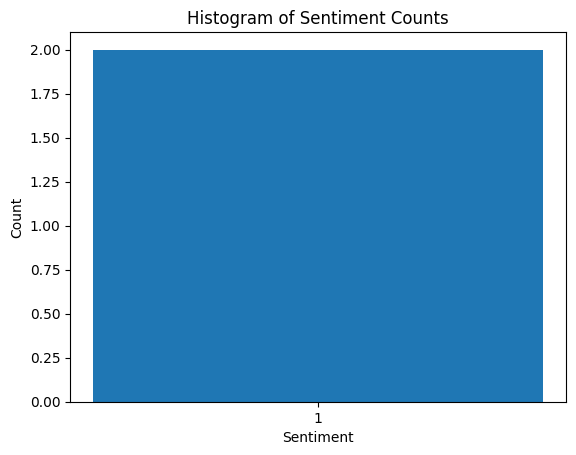

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Mock function to simulate the OpenAI API response
def mock_get_medication_sentiment(medication_name, text):
    # A mock response simulating the structure of the API response
    return {'sentiment': '1', 'reason': 'The medication helped to treat the poster with minor side effects.'}

# Sample function to get synonym for a medication
def get_synonym(medication_name):
    # Implement your logic to get synonyms here
    return "synonym"

# Sample DataFrame
data = {
    'combined_text': ["Some discussion about medication A.", "Discussion about medication B.", "Discussion about medication A and B."],
    'drug_names': [["medication_A"], ["medication_B"], ["medication_A", "medication_B"]]
}
df = pd.DataFrame(data)

# Function to process DataFrame using the mock function
def process_dataframe(df, medication_name, sentiment_function):
    rows_with_medication = df[df['drug_names'].apply(lambda x: medication_name in x)]
    sentiments = []
    reasons = []
    for index, row in rows_with_medication.iterrows():
        text = row['combined_text']
        sentiment_reason = sentiment_function(medication_name, text)
        sentiments.append(sentiment_reason['sentiment'])
        reasons.append(sentiment_reason['reason'])
    sentiment_col_name = f'sentiment_{medication_name}'
    reason_col_name = f'reason_{medication_name}'
    rows_with_medication[sentiment_col_name] = sentiments
    rows_with_medication[reason_col_name] = reasons
    return rows_with_medication

# Function to provide breakdown of sentiment for a medication
def sentiment_breakdown(df, sentiment_col_name):
    numeric_sentiments = df[sentiment_col_name].loc[df[sentiment_col_name].astype(str).str.isnumeric()].astype(int)
    sentiment_counts = numeric_sentiments.value_counts()
    total = len(df)  # Total number of sentiments, including non-numeric
    breakdown = {}
    for sentiment, count in sentiment_counts.items():
        percentage = (count / total) * 100
        breakdown[str(sentiment)] = {'count': count, 'percentage': percentage}
    
    non_numeric_sentiments = df[sentiment_col_name].loc[~df[sentiment_col_name].astype(str).str.isnumeric()]
    for sentiment in non_numeric_sentiments.unique():
        count = non_numeric_sentiments.eq(sentiment).sum()
        percentage = (count / total) * 100
        breakdown[sentiment] = {'count': count, 'percentage': percentage}
    
    return breakdown

# Function to plot histogram of sentiment counts
def plot_sentiment_histogram(df, sentiment_col_name):
    sentiment_counts = df[sentiment_col_name].value_counts()
    plt.bar(sentiment_counts.index.astype(str), sentiment_counts.values)
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.title('Histogram of Sentiment Counts')
    plt.show()

# Example usage
medication_name = 'medication_A'
# Using the mock function for testing
results_df_name = f'results_df_{medication_name}'
globals()[results_df_name] = process_dataframe(df, medication_name, mock_get_medication_sentiment)

# Get sentiment breakdown
sentiment_col_name = f'sentiment_{medication_name}'
breakdown = sentiment_breakdown(globals()[results_df_name], sentiment_col_name)
print("Sentiment Breakdown:")
for sentiment, data in breakdown.items():
    print(f"{sentiment}: Count - {data['count']}, Percentage - {data['percentage']:.2f}%")

# Plot histogram of sentiment counts
plot_sentiment_histogram(globals()[results_df_name], sentiment_col_name)


In [10]:
results_df_medication_A.head()

,combined_text,drug_names,sentiment_medication_A,reason_medication_A
0,Some discussion about medication A.,[medication_A],1,The medication helped to treat the poster with...
2,Discussion about medication A and B.,"[medication_A, medication_B]",1,The medication helped to treat the poster with...
